***
# <font color=green size=10>ANÁLISE ESTATÍSTICA -1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados
Abaixo foi realizado uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.


# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importe as biblioteca que precisar para executar as tarefas


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Accent')     #Coloquei uma paleta de cores
sns.set_style('darkgrid') 

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados/dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Traduza os elementos dentro do dataset

In [4]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [5]:
dados.Sexo = dados['Sexo'].map(sexo)
dados.UF = dados['UF'].map(uf)
dados.Cor = dados['Cor'].map(cor)

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descrever os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda vamos considerar que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.


### 1º Definir os intevalos das classes em reais (R$)

In [7]:
intervalo_renda = [dados.Renda.min(),2*788.0,5*788.0,15*788.0,25*788.0,dados.Renda.max()]
intervalo_renda

[0, 1576.0, 3940.0, 11820.0, 19700.0, 200000]

### 2º Definir os labels das classes

In [8]:
labels_classe = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [9]:
frequencia = pd.value_counts(pd.cut(dados.Renda, 
                                    bins =intervalo_renda,
                                    labels = labels_classe,
                                    include_lowest = True
))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
percentual = pd.value_counts(pd.cut(dados.Renda, 
                                    bins =intervalo_renda,
                                    labels = labels_classe,
                                    include_lowest = True
), normalize = True) *100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
frequencia_quant = pd.DataFrame({'frequencia':frequencia,'percentual': percentual})
frequencia_quant.sort_index(ascending = False, inplace = True)
frequencia_quant

,frequencia,percentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0, 0.5, 'Frequência')

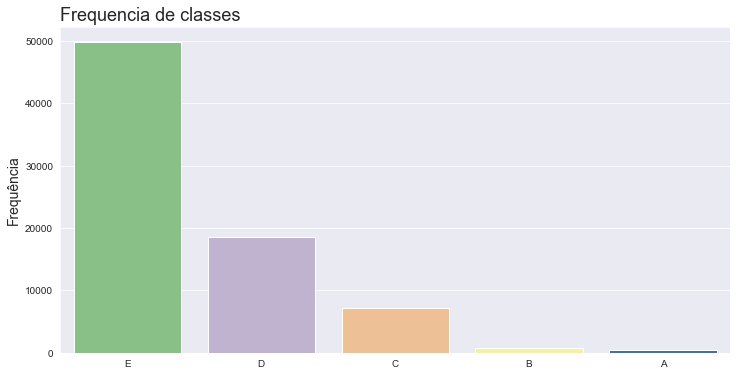

In [12]:
ax = sns.barplot(x = frequencia_quant.index , y=frequencia_quant['frequencia'], data = frequencia_quant)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequencia de classes', fontsize = 18, loc = 'left')
ax.set_ylabel('Frequência', fontsize = 14)

Text(0, 0.5, 'Percentual')

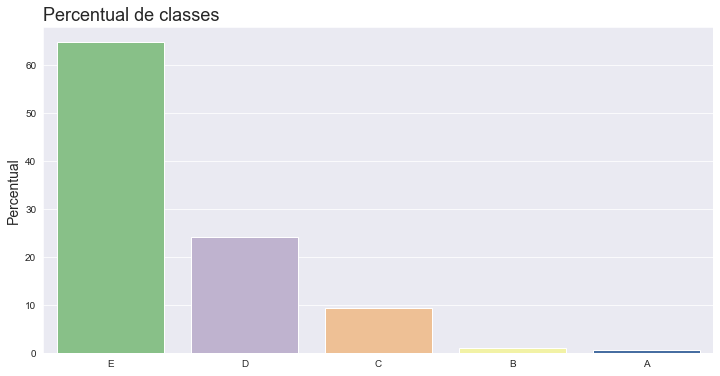

In [13]:
ax = sns.barplot(x = frequencia_quant.index , y=frequencia_quant['percentual'], data = frequencia_quant)
ax.figure.set_size_inches(12,6)
ax.set_title('Percentual de classes', fontsize = 18, loc = 'left')
ax.set_ylabel('Percentual', fontsize = 14)

> ### Conclusões

A maioria das pessoas em 2015 se encontravam na classe E, ganhando até 2 salários mínimos na época. A porcentagem atingiu 60% da população.
Em torno de 25% da população ganhavam até 5 salários mínimos, classe D. Abaixo dos 10% ganhavam até 15 salários mínimos, classe C.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
* Altura
* Renda
#### <font color='blue'>Descrever os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

C:\Users\kaue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Renda')

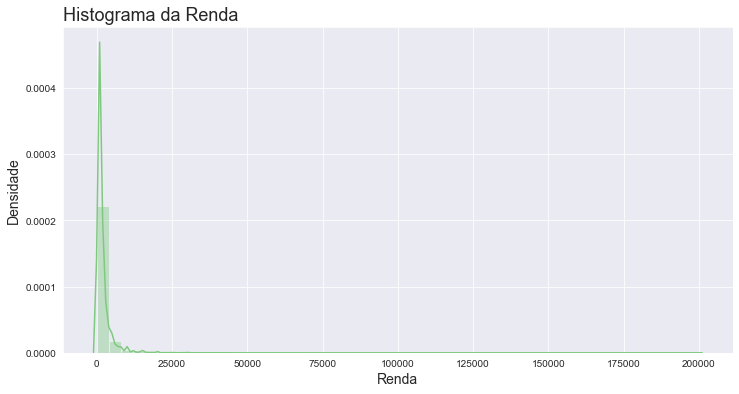

In [14]:
ax = sns.distplot(dados.Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da Renda', fontsize = 18, loc = 'left')
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)

C:\Users\kaue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Altura')

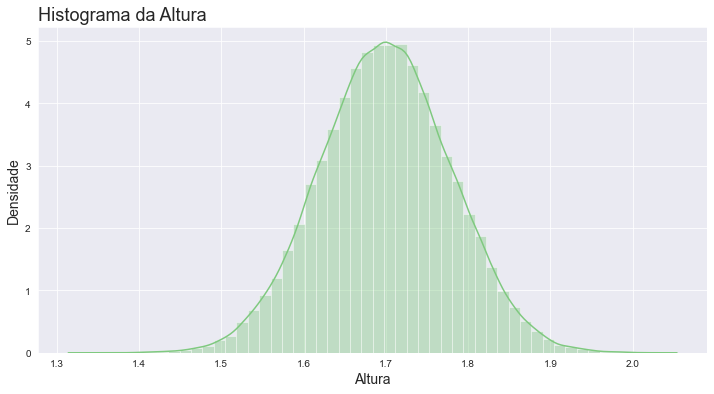

In [15]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da Altura', fontsize = 18, loc = 'left')
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Altura', fontsize = 14)

C:\Users\kaue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Idade')

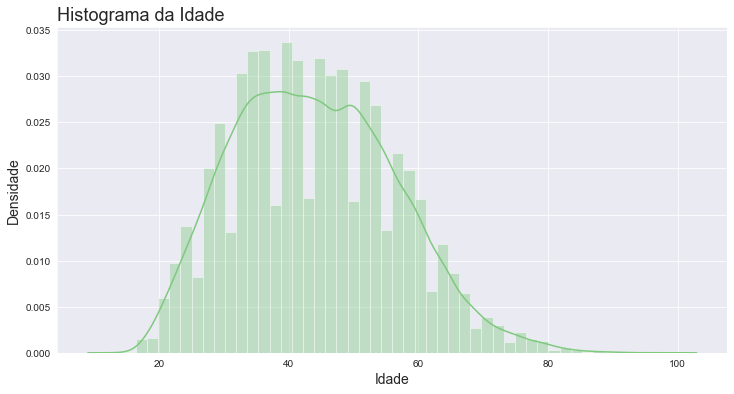

In [16]:
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da Idade', fontsize = 18, loc = 'left')
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Idade', fontsize = 14)

> ### Conclusões

A distribuição da renda segue um comportamento assimétrico a esquerda, ou seja, muita frequência no lado esquerdo do gráfico e alta diferença entre os que ganham muito e os que ganham pouco. É interessante fazer uma query para retirar alguns dados extremos neste caso.

O mesmo ocorre com o gráfico de idade. Há uma leve assimetria a direita, e algumas idades tem pouca informação, causando deformação no gráfico. Isto pode ter ocorrido pois houve remoção de alguns dados que tinha valores nulos

O gráfico de altura segue um comportamento normal, simétrico em torno do 1.7m de altura

### Para a variável Renda, vamos construir um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

C:\Users\kaue\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


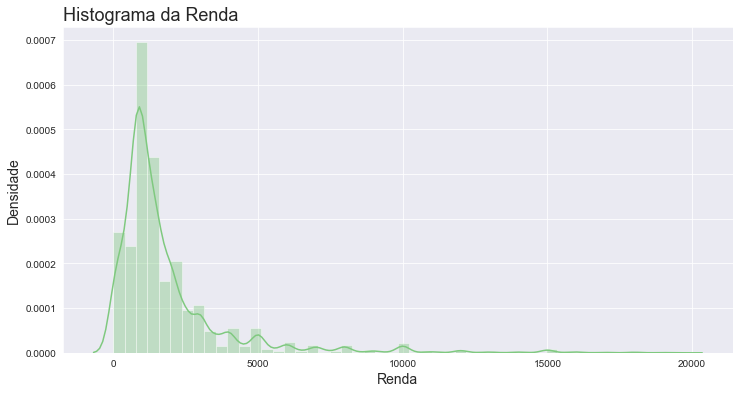

In [17]:
ax = sns.distplot(dados.query('Renda<20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da Renda', fontsize = 18, loc = 'left')
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)
ax=ax

### Histograma da renda abaixo de R$10.000 diferenciando sexo

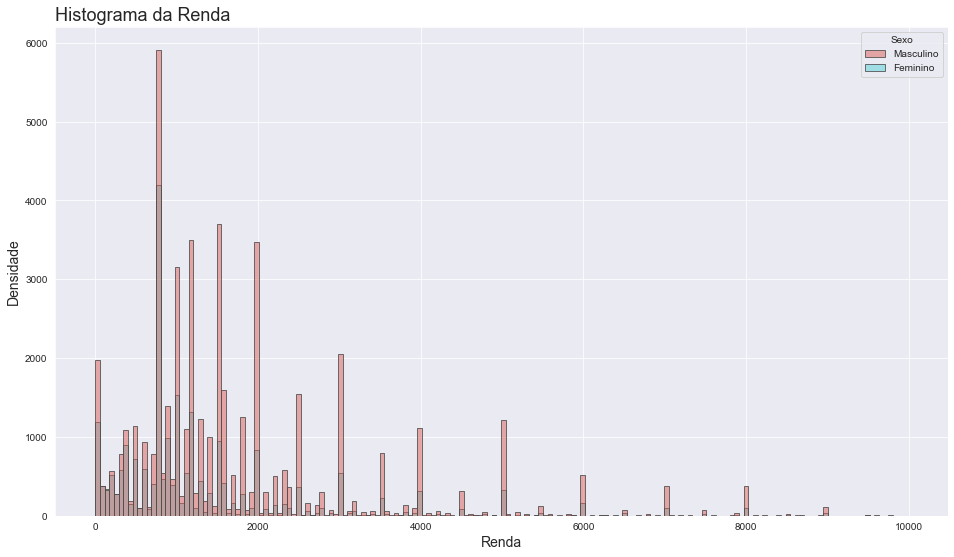

In [18]:
ax = sns.histplot(data =dados.query('Renda<10000'), x = 'Renda', hue = 'Sexo',palette="hls",edgecolor=".3",linewidth=.8)
ax.figure.set_size_inches(16,9)
ax.set_title('Histograma da Renda', fontsize = 18, loc = 'left')
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)
ax=ax

Ja podemos perceber que há menos mulheres do que homens neste dataset. Para cada renda há uma densidade maior de homens do que mulheres. E que há um pico da densidade de mulheres perto de 1000 enquanto o pico da densidade de homens está mais próximo do 2000. Esta informação mostra que os homens recendo mais que as mulheres.

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR


In [19]:
freq_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor)
freq_sexo_cor

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [20]:
perc_sexo_cor = pd.crosstab(dados.Sexo,dados.Cor, normalize = True) *100
perc_sexo_cor

Cor,Amarela,Branca,Indígena,Parda,Preta
Sexo,,,,,
Feminino,0.152264,12.520822,0.131442,14.135867,3.759761
Masculino,0.305830,28.883394,0.333160,32.617126,7.160333


> ### Conclusões

Existem muito mais pessoas da cor parda e branca do que pessoas das demais cores. A sequência de maior quantidade é: Parda, Branca, Preta, indígena e Amarela.

Também é notória a diferença entre quantidade de homens e mulheres, existindo bem mais homens em todas as cores do que mulheres.



## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [21]:
media_aritimetica = dados.Renda.mean()
media_aritimetica

2000.3831988547631

### Obtenha a mediana

In [22]:
mediana = dados.Renda.median()
mediana

1200.0

### Obtenha a moda

In [23]:
moda = dados.Renda.mode()[0]
moda

788

### Obtenha o desvio médio absoluto

In [24]:
dma = dados.Renda.mad()
dma

1526.4951371644931

### Obtenha a variância

In [25]:
variancia = dados.Renda.var()
variancia

11044906.00622118

### Obtenha o desvio-padrão

In [26]:
DP = dados.Renda.std()
DP

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [27]:
renda_cor_sexo = pd.crosstab(dados.Sexo,dados.Cor, aggfunc = {'mean','median', 'max'}, values = dados.Renda)
renda_cor_sexo

max                                                mean  \
Cor        Amarela    Branca  Indígena     Parda    Preta      Amarela   
Sexo                                                                     
Feminino   20000.0  100000.0  120000.0   30000.0  23000.0  3027.341880   
Masculino  50000.0  200000.0   10000.0  100000.0  50000.0  4758.251064   

                                                               median          \
Cor             Branca     Indígena        Parda        Preta Amarela  Branca   
Sexo                                                                            
Feminino   2109.866750  2464.386139  1176.758516  1134.596400  1500.0  1200.0   
Masculino  2925.744435  1081.710938  1659.577425  1603.861687  2800.0  1700.0   

                                    
Cor       Indígena   Parda   Preta  
Sexo                                
Feminino     788.0   800.0   800.0  
Masculino    797.5  1200.0  1200.0

In [28]:
diferenca = renda_cor_sexo.diff().dropna()
diferenca

max                                               mean  \
Cor        Amarela    Branca  Indígena    Parda    Preta      Amarela   
Sexo                                                                    
Masculino  30000.0  100000.0 -110000.0  70000.0  27000.0  1730.909183   

                                                            median         \
Cor            Branca     Indígena       Parda       Preta Amarela Branca   
Sexo                                                                        
Masculino  815.877686 -1382.675201  482.818909  469.265287  1300.0  500.0   

                                  
Cor       Indígena  Parda  Preta  
Sexo                              
Masculino      9.5  400.0  400.0

> ### Conclusões

Em média, os homens ganham mais que as mulheres na maioria das cores. A única que não segue este padrão é a indígena.

As pessoas de cores Brancas e Amarelas são as que tem a maior média de renda dentro de todas as cores, enquanto as pretas e pardas são as que tem as menores rendas. 

Com excessão da cor indígena, o valor máximo de renda do homem é o dobro ou mais que o da mulher.

Em média o salário do homem, em 2015 era de 480 pra cima maior que o dá mulher. Com excessão dos indígenas que as mulheres ganham em média 1380 a mais que os homens.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [29]:
pd.crosstab(dados.Cor,dados.Sexo, aggfunc = {'mad','var', 'std'}, values = dados.Renda)

mad                        std                        var  \
Sexo         Feminino    Masculino      Feminino    Masculino      Feminino   
Cor                                                                           
Amarela   2549.146322  3709.597211   3731.173660  5740.824820  1.392166e+07   
Branca    1670.967106  2261.012346   3251.013154  4750.791872  1.056909e+07   
Indígena  3007.892952   798.910889  11957.498292  1204.093490  1.429818e+08   
Parda      811.580946  1125.827704   1596.233048  2312.087184  2.547960e+06   
Preta      705.453357   975.602482   1349.799809  1936.309271  1.821960e+06   

                        
Sexo         Masculino  
Cor                     
Amarela   3.295707e+07  
Branca    2.257002e+07  
Indígena  1.449841e+06  
Parda     5.345747e+06  
Preta     3.749294e+06

> ### Conclusões

Os valores acima, principalmente o desvio padrão, indicam que há uma grande diferença da distribuição de renda. O desvio padrão é muito alto, o que mostra a falta de equilíbrio em torno do ponto médio.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

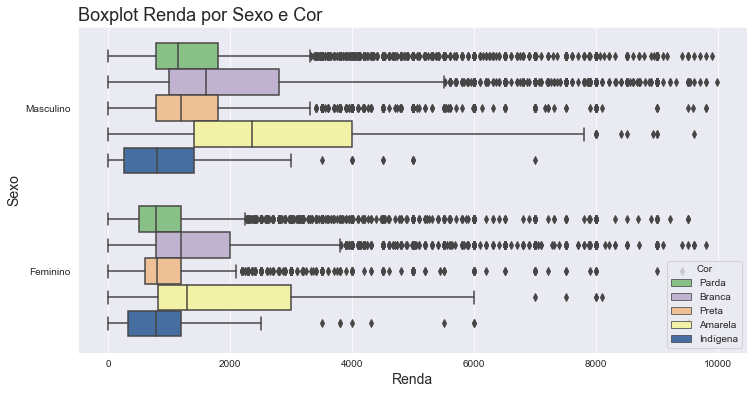

In [30]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo',data = dados.query('Renda < 10000'), orient = 'h', hue = 'Cor')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot Renda por Sexo e Cor', fontsize = 18, loc = 'left')
ax.set_ylabel('Sexo', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)
ax = ax

> ### Conclusões

Existe uma certa semelhança entre as mulheres, com algumas ressalvas. 
25% das mulheres brancas e amarelas de menor salário ganham na mesma faixa que 50% das mulheres pretas, pardas e indígenas. As brancas e amarelas ganham razoavelmente mais. 75% das mulheres brancas gannham abaixo de 2 salários mínimos. As pretas, pardas e indígenas quase 100% não chegam a 3 salários mínimos.

Os homens brancos e amarelos ganham mais que os homens pretos, pardos e indígenas, sendo os indígenas os que ganham menos. 75% dos indígenas ganham a na mesma faixa que 25% dos homens amarelos e torno de 50% dos homens brancos.
Os homens amarelhos são os que tem maiores rendas.

Os homens indígenas recebem na mesma faixa que as mulheres, chegando a receber menos que mulheres brancas e amarelas.


### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [31]:
from scipy import stats
porcentagem_SM = round(stats.percentileofscore(dados.Renda , score = 788.00, kind = 'weak'),2)
print(f'A porcentagem de pessoas que recebem menos de 1 salário mínimo: {porcentagem_SM}%')

A porcentagem de pessoas que recebem menos de 1 salário mínimo: 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [32]:
dados.Renda.quantile([i/100 for i in range (1,100)]).max()

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [33]:
pd.crosstab(dados['Anos de Estudo'],dados.Sexo, aggfunc = {'mean','median','max','std'}, values = dados.Renda).round(2)

max               mean             median            \
Sexo            Feminino Masculino Feminino Masculino Feminino Masculino   
Anos de Estudo                                                             
1                10000.0   30000.0   516.20    799.49    390.0     700.0   
2                 2000.0   30000.0   492.77    895.63    400.0     788.0   
3                 4000.0   40000.0   529.91    931.18    450.0     788.0   
4                 3500.0   80000.0   546.85   1109.20    500.0     800.0   
5                10000.0   50000.0   704.28   1302.33    788.0    1000.0   
6                 8000.0   35000.0   781.39   1338.65    788.0    1045.0   
7                 6000.0   25000.0   833.73   1448.88    788.0    1200.0   
8                 9000.0   40000.0   830.75   1465.50    788.0    1200.0   
9                18000.0   30000.0   933.62   1639.40    800.0    1300.0   
10               20000.0   60000.0   868.02   1508.04    788.0    1200.0   
11                6000.0   45000.0   925.92   1731.27    800.0    1218.0   
12              100000.0  200000.0  1286.79   2117.06   1000.0    1500.0   
13              120000.0   30000.0  1682.31   2470.33   1200.0    1800.0   
14               20000.0   25000.0  1911.73   3195.10   1300.0    2400.0   
15               20000.0   50000.0  2226.46   3706.62   1600.0    2500.0   
16              100000.0  200000.0  3899.51   6134.28   2800.0    4000.0   
17                3000.0    7000.0   798.17   1295.76    788.0    1200.0   

                    std            
Sexo           Feminino Masculino  
Anos de Estudo                     
1                639.31   1023.90  
2                425.29   1331.95  
3                498.23   1435.17  
4                424.12   2143.80  
5                629.55   1419.82  
6                635.78   1484.65  
7                574.55   1476.63  
8                602.04   1419.71  
9                896.78   1515.58  
10               973.22   2137.66  
11               620.61   2078.61  
12              1819.04   2676.54  
13              4851.83   2268.08  
14              2053.79   2797.12  
15              2064.08   3987.21  
16              4212.77   7447.61  
17               459.99    979.65

### Conclusão

Observando a coluna 16 anos de estudos para média e mediana é possível observar que as mulheres, com mesmo ano que escolaridade que os homens ganham menos e a maioria das mulheres ganham menos que a média.

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

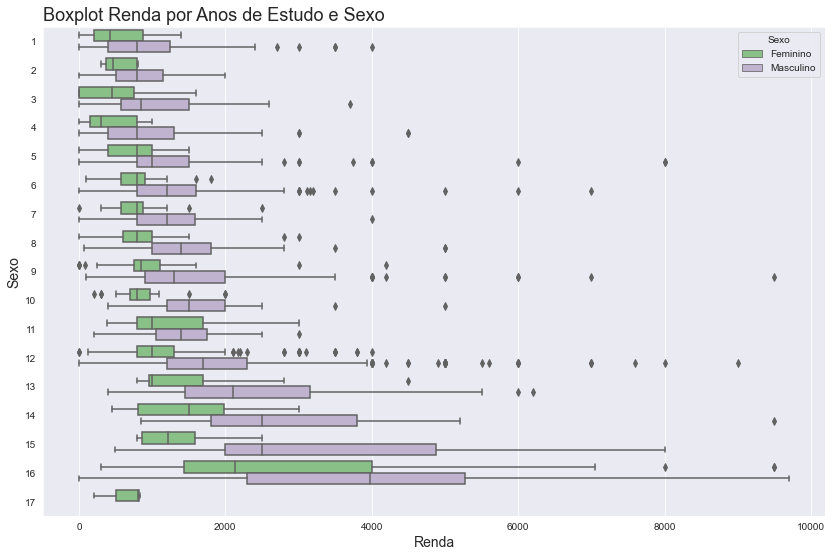

In [34]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo',data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h', hue ='Sexo')
ax.figure.set_size_inches(14,9)
ax.set_title('Boxplot Renda por Anos de Estudo e Sexo', fontsize = 18, loc = 'left')
ax.set_ylabel('Sexo', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)
ax = ax

> ### Conclusões

É notório que a mediana da renda das pessoas aumentam quando aumentam os anos de estudos. No entanto a progressão do aumento da renda é diferente para homens e mulheres. Os homens, aparentemente tem uma progressão exponencial mais acentuada que a mulher.

75% das mulheres com 16 anos de estudo tem a renda máximo que 50% dos homens com 17 anos de estudo. 

Com 16 anos de estudo 50% das mulheres recebem pouco mais que 2000, salário que 50% dos homens atingem com 13 anos de estudos.

Para receber 2000 não há nenhum outlier no caso masculino, enquanto para a mulher passa a não ser outlier após 14 anos de estudo.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [35]:
dados.groupby('UF').agg({'Renda':['mean','median','max','std']})

Renda                            
                            mean median     max          std
UF                                                          
Acre                 1506.091782    900   30000  2276.233415
Alagoas              1144.552602    788   11000  1237.856197
Amapá                1861.353516   1200   15580  2020.688632
Amazonas             1445.130100    900   22000  1757.935591
Bahia                1429.645094    800  200000  3507.917248
Ceará                1255.403692    789   25000  1821.963536
Distrito Federal     4241.954722   2000  100000  5550.463338
Espírito Santo       2026.383852   1274  100000  3513.846868
Goiás                1994.580794   1500   30000  2221.933065
Maranhão             1019.432009    700   30000  1887.816905
Mato Grosso          2130.652778   1500   35000  2542.630178
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Minas Gerais         2056.432084   1200  100000  3584.721547
Paraná               2493.870753   1500  200000  4302.937995
Paraíba              1293.370487    788   30000  1950.272431
Pará                 1399.076871    850   50000  2053.779555
Pernambuco           1527.079319    900   50000  2389.622497
Piauí                1074.550784    750   40000  2373.355726
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Rio de Janeiro       2496.403168   1400  200000  5214.583518
Rondônia             1789.761223   1200   50000  2406.161161
Roraima              1783.588889   1000   20000  2079.659238
Santa Catarina       2470.854945   1800   80000  3137.651112
Sergipe              1109.111111    788   16000  1478.997878
São Paulo            2638.104986   1600   80000  3503.777366
Tocantins            1771.094946   1000   60000  2934.590741

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

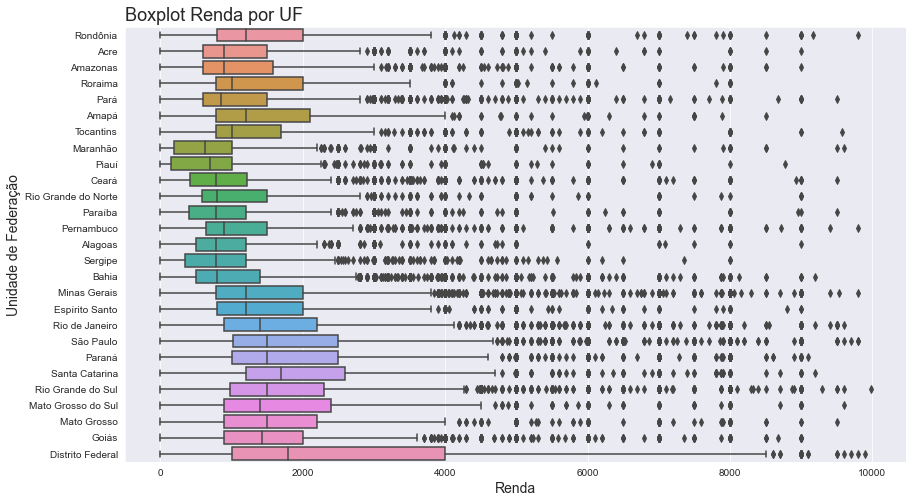

In [36]:
ax = sns.boxplot(x = 'Renda', y = 'UF',data = dados.query('Renda < 10000' ), orient = 'h')
ax.figure.set_size_inches(14,8)
ax.set_title('Boxplot Renda por UF', fontsize = 18, loc = 'left')
ax.set_ylabel('Unidade de Federação', fontsize = 14)
ax.set_xlabel('Renda', fontsize = 14)
ax = ax

> ### Conclusões

Os estado que apresentam 75% da população ganhando mais que 2000 são do Sudeste, Sul, Centro-Oeste, com excessões como Amapá e Rondônia. 
O distrito federal é o estado que apresenta maior dispesão dos salario. Todos seguem um comportamente de assimetria a direita, assim a maioria da população recebe menos que a média.